In [50]:
import pandas as pd
import time
import re
import tweepy
import requests
from bs4 import BeautifulSoup
from types import MappingProxyType
import datetime
import math
import random


# 2022-23のプレミアリーグクラブ別トップスコアラー（英語 ⇒ 選手詳細URLURL）
EPL_TOP_TEAM_SCORER_DICT: dict = MappingProxyType({
        'brentford-fc':'ブレントフォード',
        'Erling Haaland':'https://fbref.com/en/players/1f44ac21/goallogs/dom_lg/Erling-Haaland-Goal-Log',
        'everton-fc':'エヴァートン',
        'brighton-hove-albion':'ブライトン',
        'leicester-city':'レスター',
        'fulham-fc':'フラム',
        'arsenal-fc':'アーセナル',
        'newcastle-united-fc':'ニューカッスル',
        'manchester-united-fc':'マンチェスター・U',
        'afc-bournemouth':'ボーンマス',
        'southampton-fc':'サウサンプトン',
        'nottingham-forest-fc':'フォレスト',
        'leeds-united-fc':'リーズ',
        'west-ham-united-fc':'ウェストハム',
        'aston-villa-fc':'アストン・ヴィラ',
        'wolverhampton-wanderers-fc':'ウルヴァーハンプトン',
        'crystal-palace':'クリスタル・パレス',
        'tottenham-hotspur-fc':'トッテナム',
        'chelsea-fc':'チェルシー',
        'manchester-city-fc':'マンチェスター・C'
})

In [13]:
def scrapeSportsNaviPage():
    df = pd.DataFrame()

    # 1秒スリープ
    time.sleep(1)

    # スクレイピング対象のURLを生成する
#     url = 'https://fbref.com/en/comps/9/Premier-League-Stats'
#     df = pd.read_html(url)[0]
#     # マルチインデックスを解消する
#     df = df.T.reset_index(level=0, drop=True).T

#     html = requests.get(url)
#     html.encoding = "EUC-JP"
#     # HTMLを解析する
#     soup = BeautifulSoup(html.text, "lxml")
#     print(soup)
#     なんかうまくいかなかった
    
    
    
    # 対象ページ
    url = 'https://fbref.com/en/comps/9/Premier-League-Stats'

    # スクレイピング
    top_r = requests.get(url)

    # HTMLを解析する
    top_soup = BeautifulSoup(top_r.content, "html.parser")

    # テーブル情報を取得
    td_list = top_soup.find\
            ('table', id='results2022-202391_overall')    
    print(td_list)
    
    # この取り方をするとうまくいかない⇒dfを使うっていう順序忘れてたw
    
    
    # 選手の契約情報を取得

#    for num in range(len(df)):

In [23]:
def scrapeFbrefHomePage():
    df = pd.DataFrame()

    # 1秒スリープ
    time.sleep(1)

    # スクレイピング対象のURLを生成する
    url = 'https://fbref.com/en/comps/9/Premier-League-Stats'
#    print(pd.read_html(url))
    df = pd.read_html(url)[0]
    # マルチインデックスを解消する
    df = df.T.reset_index(level=0, drop=True).T
    html = requests.get(url)
    html.encoding = "EUC-JP"
    # HTMLを解析する
    soup = BeautifulSoup(html.text, "lxml")
    # リーグ順位欄と最多得点者を表示する
    df = df.drop([13,14,15,16,18,19], axis=1)
    print(df)
    
    # Top Team Scorer
    top_team_scorer_list = []
    for num in range(len(df[17])):
        top_team_scorer_list.append(df[17][num])
    print(top_team_scorer_list) # TODO: 横のスコア消す
#    for num in range(len(df)):

In [24]:
scrapeFbrefHomePage()

    0                1   2   3  4   5   6   7    8   9     10    11    12  \
0    1          Arsenal  17  14  2   1  40  14   26  44  2.59  32.3  15.0   
1    2  Manchester City  17  12  3   2  45  16   29  39  2.29  35.7  12.3   
2    3    Newcastle Utd  18   9  8   1  32  11   21  35  1.94  29.3  16.3   
3    4   Manchester Utd  17  11  2   4  27  20    7  35  2.06  25.4  19.2   
4    5        Tottenham  18  10  3   5  37  25   12  33  1.83  27.2  20.4   
5    6        Liverpool  17   8  4   5  34  22   12  28  1.65  31.1  23.7   
6    7           Fulham  18   8  4   6  30  27    3  28  1.56  25.4  30.2   
7    8         Brighton  17   8  3   6  32  25    7  27  1.59  25.4  22.0   
8    9        Brentford  18   6  8   4  30  28    2  26  1.44  25.6  24.6   
9   10          Chelsea  17   7  4   6  20  19    1  25  1.47  18.6  23.3   
10  11      Aston Villa  18   6  4   8  20  26   -6  22  1.22  22.0  23.6   
11  12   Crystal Palace  17   6  4   7  17  25   -8  22  1.29  16.8  22.8   

In [28]:
def scrapeFbrefPlayerPage():
    df_player = pd.DataFrame()

    # 1秒スリープ
    time.sleep(1)

    # スクレイピング対象のURLを生成する
    url = 'https://fbref.com/en/players/1f44ac21/goallogs/dom_lg/Erling-Haaland-Goal-Log'
    df_player = pd.read_html(url)[0]
    # マルチインデックスを解消する
    df_player = df_player.T.reset_index(level=0, drop=True).T
    print(df_player)
    html = requests.get(url)
    html.encoding = "EUC-JP"
    # HTMLを解析する
    soup = BeautifulSoup(html.text, "lxml")
    
    # Manchester Cityで決めた得点のみに限定しつつ解析すること
    # 選手横の数値をうまく切り取ってNで補完⇒dfの上からN番目までを解析できるようにする
    
    # クラブ名を補完していく
    score_club_list = []
    for num in range(21): # 選手横の数値
        score_club_list.append(df_player[6][num])
    print(score_club_list)
    
    # このクラブ名を順位表に対応させたい
    # 得点事に色を変えてdf表示できないかな
    # できそう⇒https://chayarokurokuro.hatenablog.com/entry/2021/02/25/175922
    # 順位表のクラブ名の色を変えよう
    
        
    return score_club_list;
    
    

In [29]:
score_club_list = scrapeFbrefPlayerPage()

        0           1               2             3     4                5   \
0      1.0  2022-12-31  Premier League  Matchweek 18  Home  Manchester City   
1      2.0  2022-12-28  Premier League  Matchweek 17  Away  Manchester City   
2      3.0  2022-12-28  Premier League  Matchweek 17  Away  Manchester City   
3      4.0  2022-11-05  Premier League  Matchweek 15  Home  Manchester City   
4      5.0  2022-10-22  Premier League  Matchweek 13  Home  Manchester City   
..     ...         ...             ...           ...   ...              ...   
112  110.0  2018-07-01     Eliteserien  Matchweek 15  Away            Molde   
113  111.0  2018-05-07     Eliteserien   Matchweek 8  Away            Molde   
114  112.0  2018-04-15     Eliteserien   Matchweek 5  Home            Molde   
115  113.0  2017-09-17     Eliteserien  Matchweek 22  Away            Molde   
116  114.0  2017-08-06     Eliteserien  Matchweek 18  Away            Molde   

               6  7     8     9   ...    11    12  

In [31]:
# クラブ数だけ0列の色を変える

# スクレイピング対象のURLを生成する
url = 'https://fbref.com/en/comps/9/Premier-League-Stats'
#  print(pd.read_html(url))
df = pd.read_html(url)[0]
# マルチインデックスを解消する
df = df.T.reset_index(level=0, drop=True).T
html = requests.get(url)
html.encoding = "EUC-JP"
# HTMLを解析する
soup = BeautifulSoup(html.text, "lxml")
# リーグ順位欄と最多得点者を表示する
df = df.drop([13,14,15,16,17,18,19], axis=1)
print(df)

print(score_club_list[0])

    0                1   2   3  4   5   6   7    8   9     10    11    12
0    1          Arsenal  17  14  2   1  40  14   26  44  2.59  32.3  15.0
1    2  Manchester City  17  12  3   2  45  16   29  39  2.29  35.7  12.3
2    3    Newcastle Utd  18   9  8   1  32  11   21  35  1.94  29.3  16.3
3    4   Manchester Utd  17  11  2   4  27  20    7  35  2.06  25.4  19.2
4    5        Tottenham  18  10  3   5  37  25   12  33  1.83  27.2  20.4
5    6        Liverpool  17   8  4   5  34  22   12  28  1.65  31.1  23.7
6    7           Fulham  18   8  4   6  30  27    3  28  1.56  25.4  30.2
7    8         Brighton  17   8  3   6  32  25    7  27  1.59  25.4  22.0
8    9        Brentford  18   6  8   4  30  28    2  26  1.44  25.6  24.6
9   10          Chelsea  17   7  4   6  20  19    1  25  1.47  18.6  23.3
10  11      Aston Villa  18   6  4   8  20  26   -6  22  1.22  22.0  23.6
11  12   Crystal Palace  17   6  4   7  17  25   -8  22  1.29  16.8  22.8
12  13   Leicester City  18   5  2  11

In [34]:
# 練習
##      

import pandas as pd
import numpy as np

np.random.seed(24)

df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
df.iloc[3, 3] = np.nan
df.iloc[0, 2] = np.nan

In [35]:
# 表示
df

,A,B,C,D,E
0,1.0,1.329212,NaN,-0.316280,-0.990810
1,2.0,-1.070816,-1.438713,0.564417,0.295722
2,3.0,-1.626404,0.219565,0.678805,1.889273
3,4.0,0.961538,0.104011,NaN,0.850229
4,5.0,1.453425,1.057737,0.165562,0.515018
5,6.0,-1.336936,0.562861,1.392855,-0.063328
6,7.0,0.121668,1.207603,-0.002040,1.627796
7,8.0,0.354493,1.037528,-0.385684,0.519818
8,9.0,1.686583,-1.325963,1.428984,-2.089354
9,10.0,-0.129820,0.631523,-0.586538,0.290720


In [36]:
df.style.highlight_null()

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


In [38]:
# CSS

# マイナスの値を赤くする
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [39]:
# いけた
df.style.applymap(color_negative_red)

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


In [43]:
# なるほど理解した
# ①スコアリストからクラブ毎の得点数をdfに追加する
# ②追加した列の数値に応じてクラブ名の列を色を変える
# 数値を読み取って色を変えているので、文字列を読み取って色を変えるとかもできるはず

In [44]:
def color_background_lightgreen(val):
    color = 'lightgreen' if val > 1 else '' #1より大なら薄緑、その他は白
    return 'background-color: %s' % color

#表示
df.style.applymap(color_background_lightgreen)

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


In [52]:
# https://tedukapm.tech/python/tableoutput/

import matplotlib.pyplot as plt
def TablePlot(df,outputPath,w,h):
    fig, ax = plt.subplots(figsize=(w,h))
    ax.axis('off')
    ax.table(cellText=df.values,
             colLabels=df.columns,
             loc='center',
             bbox=[0,0,1,1])
    plt.savefig(outputPath)
    plt.show()

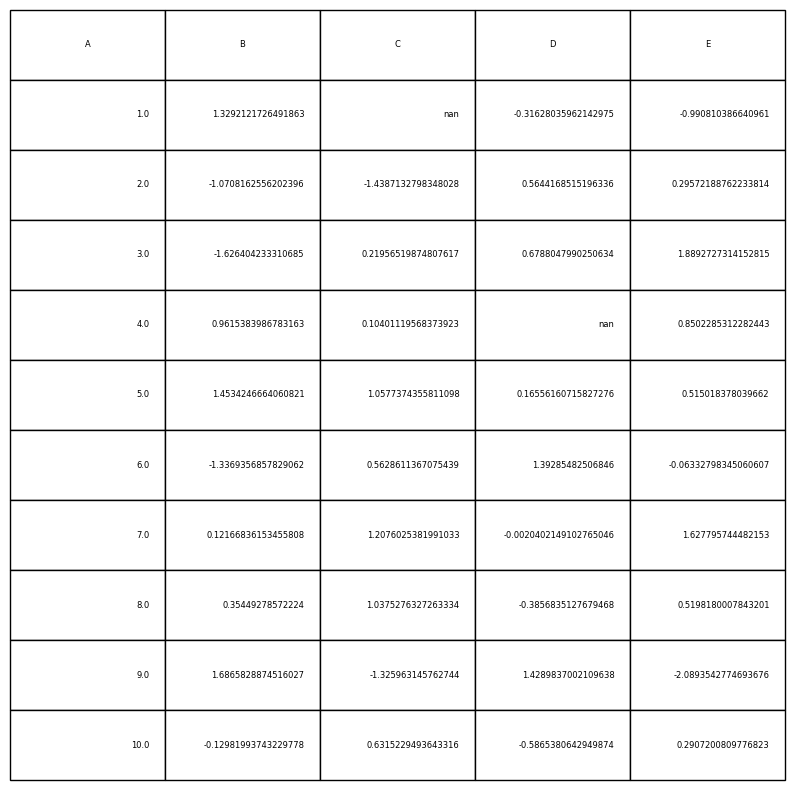

In [57]:
TablePlot(df, '../../images/test.png', 10, 10)